# Introducción a la visualización de datos con `matplotlib`

**Matplotlib** es una biblioteca de Python que permiten crear gran variedad de gráficas a partir de datos almacenados en arrays o listas. Matplotlib contiene, entre otras cosas, un módulo llamado **pyplot** que proporciona las funciones necesarias para crear las gráficas.

La documentación completa de este módulo se encuentra en https://matplotlib.org/api/pyplot_summary.html

Para empezar a usarlo, lo primero que debemos hacer es importarlo:

In [2]:
import matplotlib.pyplot as plt

### Una gráfica simple

Un modo sencillo de craer una gráfica a partir de datos almacenados en dos listas

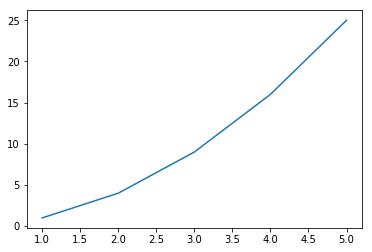

In [3]:
x = [1,2,3, 4, 5] # Valores para el eje x
y = [1,4,9,16,25] # Valores de y para cada x
plt.plot(x,y)     # Crear la gráfica
plt.show()        # Mostrar

Si no se proporcionan valores para el eje x, por defecto se toman valores enteros consecutivos empezando en 1. El código anterior sería equivalente a:

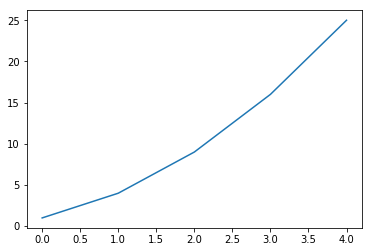

In [4]:
y = [1,4,9,16,25] 
plt.plot(y)       # Se toma por defecto valores 1,2,3...etc para el eje x       
plt.show()

### Lo mismo, con datos almacenados en arrays numpy
Los datos también pueden estar almacenados en arrays numpy. De hecho, si los datos se pasan en forma de lista, matplotlib los convierte internamente a un array numpy. El siguente código generará exactamente la misma gráfica

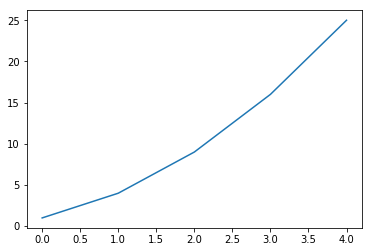

In [5]:
import numpy as np
y = np.array([1,4,9,16,25]) # Valores almacenados en un array numpy
plt.plot(y)                 # Crear la gráfica
plt.show()                  # Mostrar

### Personalización: etiquetas, títulos y rejilla
Es posible añadir etiquetas a cada uno de los ejes y un título a la gráfica. También se puede sobreimprimir una rejilla

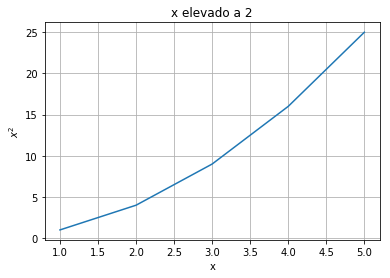

In [18]:
plt.plot(x,y)              # Crear la gráfica
plt.title("x elevado a 2") # Título
plt.xlabel("x")            # Etiqueta para el eje x
plt.ylabel("$x^2$")         # Etiqueta para el eje y
plt.grid()                 # Sobreimprimir rejilla
plt.show()                 # Mostrar

### Varias funciones en una misma gráfica: leyendas
Se puede, en la misma gráfica, representar más de una función. En ese caso, además, conviene asignar una leyenda a cada función representada.

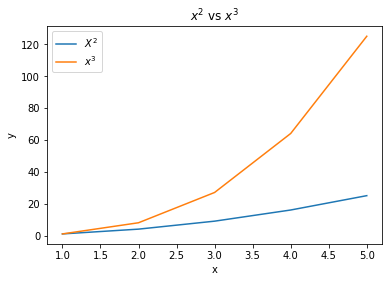

In [19]:
x = [1,2,3,4,5]              # Valores para el eje x
y = [1,4,9,16,25]            # Unos valores en función de x
z = [1,8,27,64,125]          # Otros valores en función de x
plt.plot(x,y)                # Representar los valores de y
plt.plot(x,z)                # Representar los valores de z
plt.title("$x^2$ vs $x^3$")  # Título
plt.xlabel("x")              # Etiqueta para el eje x
plt.ylabel("y")              # Etiqueta para el eje y
plt.legend(["$X^2$","$x^3$"])# Leyendas. Se proporciona una lista con una
                             # leyenda para cada una de las funciones representadas
plt.show()                   # Mostrar gráfica

También es posible especificar la leyenda en cada llamada a `plt.plot` en lugar de utilizar `plt.legend(["$x^2$", "$x^3$"])`, aunque sigue siendo necesario llamar a `plt.legend()` como se muestra a continuación:

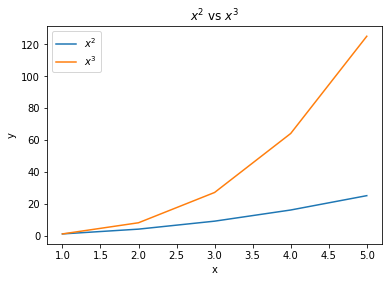

In [21]:
x = [1,2,3,4,5]             # Valores para el eje x
y = [1,4,9,16,25]           # Unos valores en función de x
z = [1,8,27,64,125]         # Otros valores en función de x
plt.plot(x,y,label="$x^2$") # Representar los valores de y
plt.plot(x,z,label="$x^3$") # Representar los valores de z
plt.title("$x^2$ vs $x^3$") # Título
plt.xlabel("x")             # Etiqueta para el eje x
plt.ylabel("y")             # Etiqueta para el eje y
plt.legend()                # Hace falta de todos modos
plt.show()                  # Mostrar gráfica

### Personalización: tipo de línea y color

Para cada conjunto de datos a visualizar, existe un argumento opcional que define el color y tipo del gráfico. Este argumento es una cadena formada por la concatenación de un color (p. ej 'b', 'g', 'r' para blue, green y red respectivamente) y un estilo de línea (p.ej. 'o', '+', '^', '-', '--' para punto, símbolo +, triángulo, línea contínua y línea discontínua respectivamente). Por ejemplo, la cadena 'bo' representa los datos mediante puntos azules. El parámetro por defecto para el primer conjunto de datos es 'b-', esto es, una línea sólida de color azul. A continuación se muestra un ejemplo:


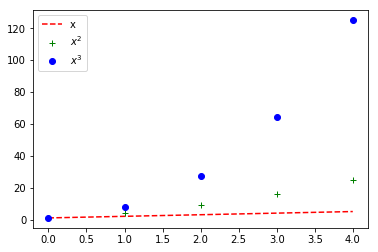

In [13]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]   
z = [1,8,27,64,125]
plt.plot(x, 'r--')
plt.plot(y, 'g+')
plt.plot(z, 'bo')
plt.legend(['x', '$x^2$', '$x^3$'])
plt.show()

### Calcular los datos a visualizar automáticamente como *y=f(x)* 
En ocasiones los datos a mostrar deben calcularlos el propio programa mediante alguna función. En este caso, lo habitual es (1) crear un array con valores consecutivos de x en el rango deseado y, a continuación, (2) calcular los valores de y para cada x.

Para (1) se puede usar la función linspace disponible en numpy en la que los dos primeros argumentos indican el rango de la variable x (mínimo y máximo) y el tercero la cantidad de valores (equidistantes) que se quiere en ese rango. Por ejemplo, np.linspace(1,10,101) devuelve un array de 101 elementos con los valores 1, 1.1, 1.2, ... 9.9, 10.

Para (2) se puede crear un array vacío del mismo tamaño que el creado en (1) y, mediante un bucle, asignarle los valores deseados en función de los valores en (1).

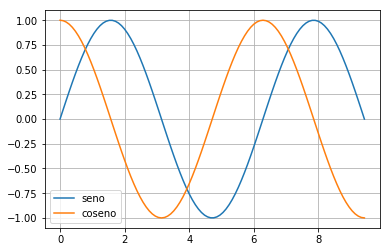

In [11]:
import numpy as np
import math
x = np.linspace(0, 3*math.pi, 100) # Crea array de 100 valores
                                   # equidistantes entre 0 y 3PI
seno = np.empty(len(x))            # Crea array vacío de tamaño len(x)
coseno = np.empty(len(x))          # Crea otro array vacío de mismo tamaño
for i in range(len(x)):            # Almacena valores en seno y coseno
    seno[i] = math.sin(x[i])
    coseno[i] = math.cos(x[i])
plt.plot(x,seno)                   
plt.plot(x,coseno)
plt.legend(['seno', 'coseno'])
plt.grid()
plt.show()


### Gráficas de barras (con una única variable dependiente)

Matplotlib permite crear gráficas de muy diversos tipos. A continuación, y a modo de ejemplo, se muestra cómo crear gráficas de barras. Para ello, en lugar de *plt.plot* deberá usarse *plt.bar*

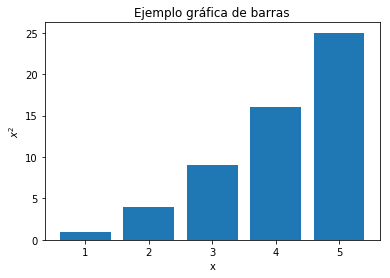

In [22]:
x = [1,2,3,4,5]           # Valores para el eje x
y = [1,4,9,16,25]         # Valores para el eje y

plt.bar(x,y)              # Representar los valores de y en función de x
plt.title("Ejemplo gráfica de barras") 
plt.xlabel("x")           # Etiqueta para el eje x
plt.ylabel("$x^2$")       # Etiqueta para el eje y
plt.show()                # Mostrar gráfica

### Gráficas de barras (con más de una variable dependiente)
Si se desea representar más de un conjunto de datos mediante barras sin apilar, deberá desplazarse la x de cada conjunto (unas hacia la derecha y otras hacia la izquierda) y ajustar su anchura para que sus barras no se solapen.

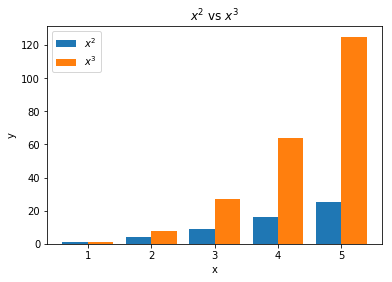

In [16]:
x = np.array([1,2,3,4,5])           # Valores para el eje x
y = np.array([1,4,9,16,25])         # Unos valores en función de x
z = np.array([1,8,27,64,125])

plt.bar(x-0.2, y, width=0.4)    # Desplazamos las x 0.2 a la izquierda y 
                                # establecemos el ancho de barra a 0.4
plt.bar(x+0.2, z, width=0.4)    # Desplazamos las x 0.2 a la derecha y 
                                # establecemos el ancho de barra a 0.4
plt.title("$x^2$ vs $x^3$")     # Título
plt.xlabel("x")                 # Etiqueta para el eje x
plt.ylabel("y")                 # Etiqueta para el eje y
plt.legend(["$x^2$", "$x^3$"])      # Leyendas. Se proporciona una lista con una
                                # leyenda para cada una de las funciones
plt.show()                      # Mostrar gráfica

O, si se prefiere, pueden apilarse especicando en la función *plt.bar* el argumento *bottom* que indica las alturas y a partir de las cuales debe dibujarse cada barra

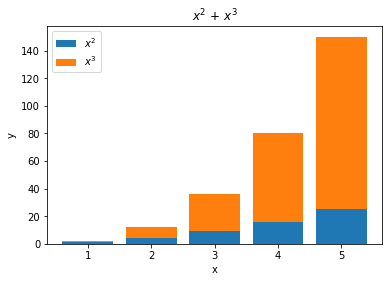

In [17]:
x = np.array([1,2,3,4,5]) 
y = np.array([1,4,9,16,25])        
z = np.array([1,8,27,64,125])

plt.bar(x,y)                    # Representar valores y mediante barras                                
plt.bar(x, z, bottom=y)         # Representar valores z apilados sobre los de y
plt.title("$x^2$ + $x^3$")         
plt.xlabel("x")                
plt.ylabel("y")                 
plt.legend(["$x^2$", "$x^3$"])                                  
plt.show()                     